# BLEU 스코어 이해하기

 (Bilingual Evaluation Understudy)
- 명칭:
    - Bilingual : 기계 번역의 성능을 평가하기 위한
    - Evaluation Understudy : 인간을 대체하는 자동화 평가 방법

- 개발 목적 : 기계 번역의 성능을 평가하기 위해 개발 (IBM, 2001)
"BLEU: a Method for Automatic Evaluation of Machine Translation"

- 핵심 개념 :
    - 정밀도(Precision) 중심: 기계 번역 출력에 있는 n-gram이 참조 번역에도 얼마나 나타나는지 측정
    - 수정된 정밀도(Modified Precision): 번역문에서 각 n-gram은 참조 번역에 나타나는 최대 횟수까지만 카운트
    이는 같은 단어를 과도하게 반복하는 것을 방지
    - Brevity Penalty: 너무 짧은 번역에 불이익을 주는 패널티 요소
    이는 높은 정밀도를 얻기 위해 출력을 과도하게 줄이는 것을 방지
    - n-gram 기하평균: BLEU는 일반적으로 1-gram(단어)부터 4-gram까지의 수정된 정밀도의 기하평균을 계산

- 계산식:
    `BLEU = BP × exp(∑(wn × log(pn)))`

        - BP: Brevity Penalty
        - wn: n-gram 가중치(보통 균등 가중치)
        - pn: n-gram 수정된 정밀도
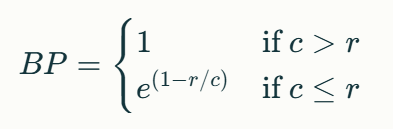
- 한계:
    - 단어 순서의 중요성 과소평가:
    - 의미적 유사성 무시:
    - 문맥 이해 부족:
    - 사람의 판단과 불일치: 높은 BLEU 점수가 항상 인간이 인식하는 높은 번역 품질과 일치x
    - 언어 간 차이: 모든 언어 쌍에 동일하게 효과x

- 결론
BLEU는 기계 번역 평가의 기준점이 되었으며, 여전히 가장 널리 사용되는 지표 중 하나. 단순함과 계산 효율성이 큰 장점이지만, 번역 품질의 모든 측면을 포착하지는 못한다. 최근에는 BLEU를 다른 보완적인 지표들과 함께 사용하는 것이 권장된다.

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 15.6 MB/s eta 0:00:00


In [ ]:
from collections import Counter
import math
from konlpy.tag import Okt
from nltk.util import ngrams

In [ ]:
def tokenize_korean(text):
    """한국어 텍스트를 토큰화합니다."""
    okt = Okt()
    return okt.morphs(text)

def get_ngrams(tokens, n):
    """토큰에서 n-gram을 생성합니다."""
    return list(ngrams(tokens, n))

def count_ngrams(ngram_list):
    """n-gram의 빈도를 계산합니다."""
    return Counter(ngram_list)

In [ ]:
reference = "인공지능 기술은 우리의 일상 생활을 변화시키고 있습니다."
candidate = "인공지능 기술이 우리 생활을 크게 변화시키고 있다."

In [ ]:
# 토큰화
ref_tokens = tokenize_korean(reference)
cand_tokens = tokenize_korean(candidate)
print(ref_tokens)
print(cand_tokens)

['인공', '지능', '기술', '은', '우리', '의', '일상', '생활', '을', '변화', '시키고', '있습니다', '.']
['인공', '지능', '기술', '이', '우리', '생활', '을', '크게', '변화', '시키고', '있다', '.']


In [ ]:
# bi-gram 생성
ref_ngrams = get_ngrams(ref_tokens, 2)
cand_ngrams = get_ngrams(cand_tokens, 2)
print(ref_ngrams)
print(cand_ngrams)

[('인공', '지능'), ('지능', '기술'), ('기술', '은'), ('은', '우리'), ('우리', '의'), ('의', '일상'), ('일상', '생활'), ('생활', '을'), ('을', '변화'), ('변화', '시키고'), ('시키고', '있습니다'), ('있습니다', '.')]
[('인공', '지능'), ('지능', '기술'), ('기술', '이'), ('이', '우리'), ('우리', '생활'), ('생활', '을'), ('을', '크게'), ('크게', '변화'), ('변화', '시키고'), ('시키고', '있다'), ('있다', '.')]


In [ ]:
# n-gram 빈도 계산
ref_count = count_ngrams(ref_ngrams)
cand_count = count_ngrams(cand_ngrams)
print(ref_count)
print(cand_count)

Counter({('인공', '지능'): 1, ('지능', '기술'): 1, ('기술', '은'): 1, ('은', '우리'): 1, ('우리', '의'): 1, ('의', '일상'): 1, ('일상', '생활'): 1, ('생활', '을'): 1, ('을', '변화'): 1, ('변화', '시키고'): 1, ('시키고', '있습니다'): 1, ('있습니다', '.'): 1})
Counter({('인공', '지능'): 1, ('지능', '기술'): 1, ('기술', '이'): 1, ('이', '우리'): 1, ('우리', '생활'): 1, ('생활', '을'): 1, ('을', '크게'): 1, ('크게', '변화'): 1, ('변화', '시키고'): 1, ('시키고', '있다'): 1, ('있다', '.'): 1})


In [ ]:
def clipped_precision(reference_tokens, candidate_tokens, n):
    """수정된 정밀도를 계산합니다.

    Args:
        reference_tokens: 참조 텍스트의 토큰 리스트
        candidate_tokens: 후보 텍스트의 토큰 리스트
        n: n-gram의 크기

    Returns:
        수정된 정밀도 값
    """
    # n-gram 생성
    ref_ngrams = get_ngrams(reference_tokens, n)
    cand_ngrams = get_ngrams(candidate_tokens, n)

    if len(cand_ngrams) == 0:
        return 0.0

    # n-gram 빈도 계산
    ref_count = count_ngrams(ref_ngrams)
    cand_count = count_ngrams(cand_ngrams)

    # 클리핑된 카운트 계산
    clipped_counts = 0
    for ngram in cand_count:
        clipped_counts += min(cand_count[ngram], ref_count.get(ngram, 0))

    # 수정된 정밀도 계산
    return clipped_counts / max(len(cand_ngrams), 1)

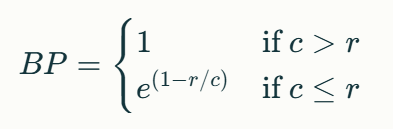

In [ ]:
def brevity_penalty(reference_tokens, candidate_tokens):
    """간결성 패널티를 계산합니다."""

    ref_length = len(reference_tokens)
    cand_length = len(candidate_tokens)

    if cand_length > ref_length:
        return 1.0
    elif cand_length == 0:
        return 0.0
    else:
        return math.exp(1 - ref_length / cand_length)

In [ ]:
# BLEU = BP × exp(∑(wn × log(pn)))
def bleu_score(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    """BLEU 점수를 계산합니다.

    Args:
        reference: 참조 텍스트 (문자열)
        candidate: 후보 텍스트 (문자열)
        weights: 각 n-gram 정밀도의 가중치 (기본값은 BLEU-4로 1-gram부터 4-gram까지 동일 가중치)

    Returns:
        BLEU 점수 (0~1 사이 값)
    """
    # 토큰화
    ref_tokens = tokenize_korean(reference)
    cand_tokens = tokenize_korean(candidate)

    # 정밀도 계산
    precisions = []
    for i in range(1, len(weights) + 1):
        if i <= min(len(ref_tokens), len(cand_tokens)):
            precision = clipped_precision(ref_tokens, cand_tokens, i)
        else:
            precision = 0.0
        precisions.append(precision)

    # 로그 정밀도의 가중합 계산
    # ∑(wn × log(pn))
    log_precisions = 0
    for i, precision in enumerate(precisions):
        if precision > 0:
            log_precisions += weights[i] * math.log(precision)

    # 간결성 패널티 계산
    bp = brevity_penalty(ref_tokens, cand_tokens)

    # BLEU 점수 계산
    # BLEU = BP × exp(∑(wn × log(pn)))
    bleu = bp * math.exp(log_precisions)

    return bleu, precisions, bp

def bleu_1(reference, candidate):
    """BLEU-1 점수만 계산합니다."""
    score, precisions, bp = bleu_score(reference, candidate, weights=[1.0])
    return score, precisions[0], bp

def bleu_2(reference, candidate):
    """BLEU-1과 BLEU-2의 기하평균을 계산합니다."""
    score, precisions, bp = bleu_score(reference, candidate, weights=[0.5, 0.5])
    return score, precisions, bp

In [ ]:
# 예시 1: 유사한 문장
reference1 = "인공지능 기술은 우리의 일상 생활을 변화시키고 있습니다."
candidate1 = "인공지능 기술이 우리 생활을 크게 변화시키고 있어요."

# 예시 2: 요약 예시
reference2 = "대한민국의 수도 서울은 인구 밀도가 높고 다양한 문화를 가진 대도시입니다. 한강이 도시를 가로지르며 많은 관광 명소가 있습니다."
candidate2 = "서울은 인구 밀도가 높은 대한민국의 수도로, 한강이 도시를 관통합니다."

# 예시 3: 뉴스 기사 요약
reference3 = "정부는 오늘 코로나19 방역 지침을 완화하고 사회적 거리두기를 1단계로 하향 조정한다고 발표했다. 이에 따라 다중시설 이용 인원 제한이 해제되고 마스크 착용 의무도 실외에서는 폐지된다."
candidate3 = "정부가 코로나19 방역 지침을 완화하고 사회적 거리두기를 1단계로 낮추기로 했다. 실외 마스크 착용 의무가 없어진다."


In [ ]:
reference, candidate = reference1, candidate1

# 토큰화 결과 출력
okt = Okt()
ref_tokens = okt.morphs(reference)
print(f"\n토큰화 예시 (참조 텍스트): {ref_tokens[:10]}...")

# BLEU-1 계산
b1_score, b1_precision, b1_bp = bleu_1(reference, candidate)
print(f"\nBLEU-1 - 점수: {b1_score:.4f}, 정밀도: {b1_precision:.4f}, BP: {b1_bp:.4f}")

# BLEU-2 계산
b2_score, (b1_precision, b2_precision), b2_bp = bleu_2(reference, candidate)
print(f"BLEU-2 - 점수: {b2_score:.4f}, 1-gram 정밀도: {b1_precision:.4f}, 2-gram 정밀도: {b2_precision:.4f}, BP: {b2_bp:.4f}")
print("-" * 80)


토큰화 예시 (참조 텍스트): ['인공', '지능', '기술', '은', '우리', '의', '일상', '생활', '을', '변화']...

BLEU-1 - 점수: 0.6900, 정밀도: 0.7500, BP: 0.9200
BLEU-2 - 점수: 0.4805, 1-gram 정밀도: 0.7500, 2-gram 정밀도: 0.3636, BP: 0.9200
--------------------------------------------------------------------------------
